In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def get_content(article_name):
    return BeautifulSoup(requests.get('https://en.wikipedia.org/wiki/'+article_name).text)
# data=get_content("Ozone_layer")

In [3]:
def merge_contents(data):
    text = ""
    for article in data.find_all('p'): text += "".join(article.text)
    return text
# merge_content = merge_contents(data)   
# merge_contents(data)


In [4]:
def tokenize(content):
    return re.sub("([\(\[]).*?([\)\]])",'', content).replace("."," ").replace(","," ").replace("\\n"," ").replace("\n"," ").replace("-"," ").split(" ")
# collection = tokenize(merge_content)

In [5]:
def lower_collection(collection):
    return [i.lower() for i in collection]
# lower_collection=lower_collection(collection)

In [6]:
def remove_stop_words(words, stop_words):
    return np.array([i for i in words if i not in stop_words])
# clearr_data=remove_stop_words(lower_collection, ['the',''])

In [7]:
def count_frequency(collection):
    return Counter(np.array(collection))
# frequency=count_frequency(clearr_data)

In [8]:
def print_most_frequent(frequencies,n):
 	print(str(n) + " the most common words:")
 	for word in frequencies.most_common(n):
 		print('"' + list(word)[0]+'"' + " occurs " + str(list(word)[1]) + " time")
# print_most_frequent(frequency, 10)

In [9]:
def vizualizing(data): 
 	data = data.most_common(20)
 	labels, values = zip(*dict(data).items())
 	indSort = np.argsort(values)
 	labels,values = np.array(labels)[indSort],np.array(values)[indSort]
 	plt.barh(labels,values)
 	plt.title('Most common 20 words in article')
 	plt.show()
    
# vizualizing(frequency)

In [10]:
def _main():
    data=get_content("Ozone_layer")
    merge_content = merge_contents(data)
    collection = tokenize(merge_content)
    lower_=lower_collection(collection)
    stop_words = ["the", "a", "of", "to", "in", "about","by","ozone",
                  "and","is","layer","that","","are","as","be","uv","was",
                  "it","at","have","for","from","on","with","thit","has","this","these","or"]
    clearr_data=remove_stop_words(lower_, stop_words)
    frequency=count_frequency(clearr_data)
    print_most_frequent(frequency, 10)
    return vizualizing(frequency)

10 the most common words:
"radiation" occurs 17 time
"ultraviolet" occurs 12 time
"atmosphere" occurs 12 time
"surface" occurs 11 time
"stratosphere" occurs 10 time
"depletion" occurs 10 time
"which" occurs 9 time
"because" occurs 8 time
"earth's" occurs 7 time
"skin" occurs 7 time


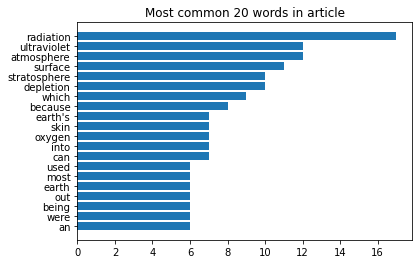

In [11]:
_main()